# Tutorial 7: pedestrian crossings and obstructions
_____________________________________________________________________________________

## Overview
Traffic flow is far from smooth even if there is not a stop street, traffic light or traffic circle upstream. One of the reasons for this is that vehicles must constantly react to pedestrians and numerous other obstructions that exist. These elements contribute to the burstiness of vehicle arrivals - periods of no arrivals followed by periods of a high arrival rate.

We have created a specific component for pedestrian crossings. In `__basik__` we have intended for this to be a pedestrian crossing regulated by some crossing mechanism. A user pushes a button that will schedule a crossing for the collected pedestrians on either side of the road. Hence, they will all cross at once. During this time, vehicles will remain stationary. We have allowed pedestrian crossings to follow that of a time-continuous Markov Chain.

We have also allowed for obstructions to occur at the node objects that make up the lane objects (lane objects make up road objects). These obstructions come in two variants: 
1. The node is either obstructed for a duration at a scheduled time (e.g. a pedestrian or cow crosses the road randomly).
2. The nodes delays a specified amount of vehicles starting from a scheduled time (e.g. a blown water-pipe that must be crossed with care).

We present examples of all three methods of obstructing traffic flow.

In [1]:
import __basik__ as bk

/home/dylan/Documents/Basik_Tutorial/__basik__/__init__.py:37: UserWarning: __basik__ has picked up that it is currently being run from within a Ipython or Jupyter Notebook. Display components requireQtA5gg to render. Most Ipython-based interactive notebooks havetheir kernel shut down when using QtA5gg as a Matplotlib backend. Hence, __basik__ will not use QtA5gg. As a result, please refrain from using __basik__ display components while in the Ipython or Jupyter Notebook environment. If display components are required, please use Ipython in a console. The Spyder IDE for Python is highly recommended.
  warnings.warn(message)


Importing matplotlib.pyplot as plt



## Pedestrian crossing
We discuss how to schedule pedestrian crossing events. The events follow a two-state continuous-time Markov Chain. That is, it is characterised by a generator matrix of size 2 x 2. We only need holding times for each state to characterise this. Holding times are the mean amount of time that the system will remain in a state. For state $n$, it can be calculated as the reciprocal of the sum of all off-diagonal elements in row $n$. This situation is simplified in a two state system as there is only one off-diagonal element.

Our two states are ON and OFF. The ON state is when the pedestrian crossing is active and has pedestrians crossing. It has a holding time $T_{\mbox{on}}$. When vehicles are allowed to cross we have the OFF state as no pedestrian may cross. This has a holding time $T_{\mbox{off}}$. This along with the probability of starting in the ON state is all that is required by the user. `__basik__` will build the generator matrix (rate matrix) from the holding times as follows:

$$
Q = 
\left[
\begin{matrix}
-\frac{1}{T_{\mbox{on}}} & \frac{1}{T_{\mbox{on}}}\\
\frac{1}{T_{\mbox{off}}} & -\frac{1}{T_{\mbox{off}}}
\end{matrix}
\right]
$$

It will then simulate ON and OFF events using the embedded chain (underlying discrete Markov Chain) derived from the generator matrix via Uniformisation.

DISPLAY OFF
Setting up simulation...


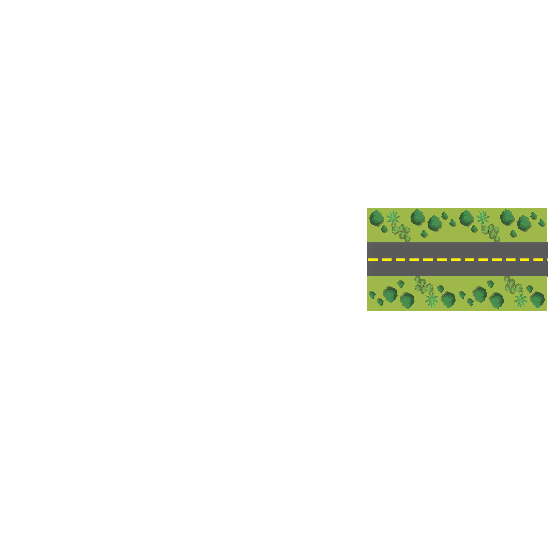

Scheduling Eastern arrivals...
..done!
Scheduling Western arrivals...
..done!
Populating simulation...
...done!


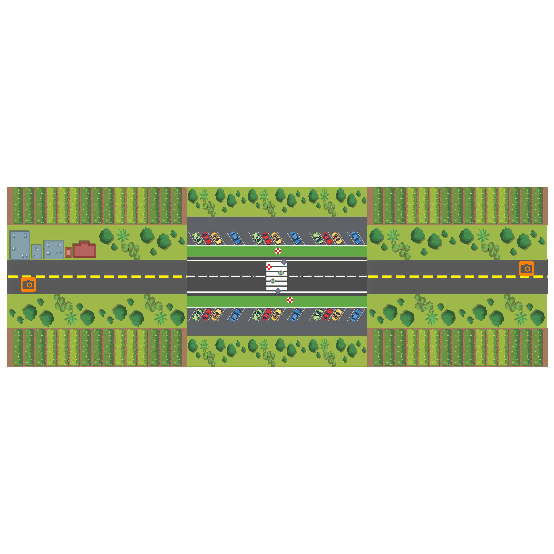

In [2]:
bk.VehicleDisplay.speed_up_factor = 10
bk.Vehicle.frames_per_move = 2
import numpy as np
bk.VehicleDisplay.SHOW = False # TURN OFF
print('DISPLAY OFF')
print('Setting up simulation...')
np.random.seed(123)
fig,ax = bk.axes_grid(3,3,scale=2.5)  
end_time = 21
lane_length = 5 
bk.Queue.clear()
# East 
Elane_in = bk.Lane(lane_length) 
Elane_out = bk.Lane(lane_length) 
EDisplay = bk.RoadDisplay(left_lane=Elane_out,
                          right_lane=Elane_in,
                          axes=ax[1,2],
                          horizontal=True)
Erate = {end_time:bk.Rate(0.3)} 
Esource = bk.Source(vehicle_velocity = 16.67,  
                    target_node = Elane_in.IN,
                    rate_schedule=Erate)
print('Scheduling Eastern arrivals...')
Esource.setup_arrivals(end_time)
print('..done!')
Erecord = bk.Record(Elane_out.OUT)   
# West
Wlane_in = bk.Lane(lane_length) 
Wlane_out = bk.Lane(lane_length)
WDisplay = bk.RoadDisplay(left_lane=Wlane_in,
                          right_lane=Wlane_out,
                          axes=ax[1,0],
                          horizontal=True)
Wrate = {end_time:bk.Rate(0.5)} 
Wsource = bk.Source(vehicle_velocity = 16.67,  # 60 km/h
                    target_node = Wlane_in.IN,
                    rate_schedule=Wrate)
print('Scheduling Western arrivals...')
Wsource.setup_arrivals(end_time)
print('..done!')
Wrecord = bk.Record(Wlane_out.OUT)
# Pedestrian Crossing
cross = bk.PedestrianCrossing(W_to_E_in_node=Wlane_in.OUT,
                                   E_to_W_in_node=Elane_in.OUT,
                                   W_to_E_out_node=Elane_out.IN,
                                   E_to_W_out_node=Wlane_out.IN,
                                   on_duration=2,
                                   off_duration=2,
                                   on_initial_probability=0.99)
cross.setup_cycles(end_time*2)
cross_display = bk.PedestrianCrossingDisplay(cross,
                                          horizontal=True,
                                          axes=ax[1,1])
print('Populating simulation...')
bk.Queue.run(end_time/2)
print('...done!')
fig

Turning on display...
...done!
Performing simulation with display...
...done!


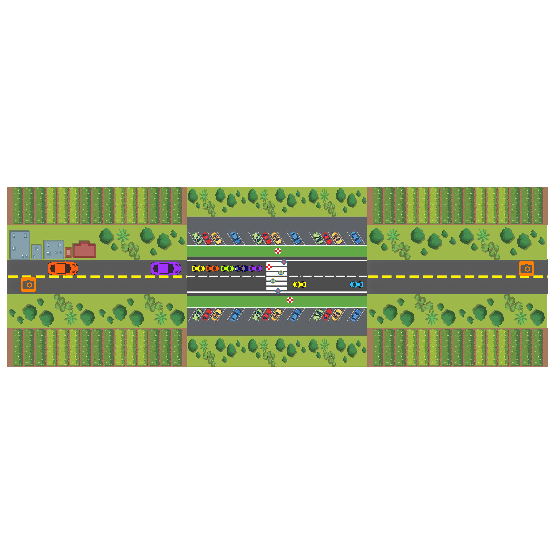

In [3]:
# WITH DISPLAY
print('Turning on display...')
bk.VehicleDisplay.SHOW = True # TURN OFF
for component in bk.Queue.content:
    if isinstance(component,bk.Vehicle):  
        display = component.vehicle_display      
        display.show()
print('...done!')

start_time = bk.Queue.current_time
print('Performing simulation with display...')
#bk.Queue.run(end_time=end_time,
#             start_time=start_time)
print('...done!')
fig

In [4]:
from IPython.display import Video
import os
path = os.getcwd()+'/Videos/pedestrian_crossing.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

**NOTE**: pedestrians are represented by the umbrellas.
To reproduce these results/video please see `Basik_Tutorial/Console_Scripts/pedestrian_crossing.py`

## Type 1 Obstruction
This obstruction starts at a scheduled time and then does not allow for vehicle passage to a specific node during the duration of its existence.

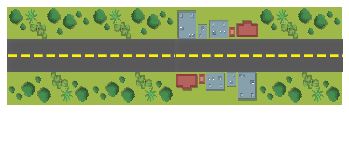

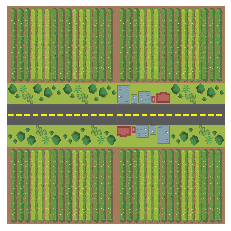

In [7]:
np.random.seed(123)
bk.Queue.clear()
fig,ax = plt.subplots(1,1)
end_time = 20
# Let us create a single lane object
lane = bk.Lane(10)
lane_display = bk.RoadDisplay(left_lane=lane,
                              right_lane=None,
                              axes=ax,
                              horizontal=True)
rate = {end_time:bk.Rate(0.3)} 
source = bk.Source(vehicle_velocity = 16.67,  
                   target_node = lane.IN,
                   rate_schedule=rate)
source.setup_arrivals(20)
# Let us schedule three obstructions at some node
lane.nodes[4].schedule_obstructions(start_times=[0,20], 
                                    durations=[9,5])
# Run
#bk.Queue.run(end_time)
fig

In [8]:
path = os.getcwd()+'/Videos/type_1_obstruction.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

## Type 2 Obstruction
This obstruction will delay $n$ amounts of vehicles at a specific node.

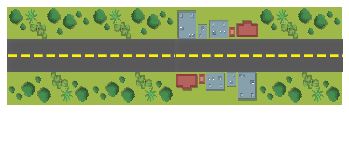

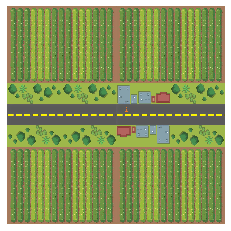

In [9]:
np.random.seed(123)
bk.Queue.clear()
fig,ax = plt.subplots(1,1)
end_time = 20
# Let us create a single lane object
lane = bk.Lane(10)
lane_display = bk.RoadDisplay(left_lane=lane,
                              right_lane=None,
                              axes=ax,
                              horizontal=True)
rate = {end_time:bk.Rate(0.1)} 
source = bk.Source(vehicle_velocity = 16.67,  
                   target_node = lane.IN,
                   rate_schedule=rate)
source.setup_arrivals(20)
# Let us schedule three obstructions at some node
lane.nodes[5].schedule_n_obstructions(n=5,  # how many vehicles to obstruct/delay
                                      duration=1) # duration of the delay
# Run
#bk.Queue.run(end_time)
fig

In [10]:
path = os.getcwd()+'/Videos/type_2_obstruction.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

## Conclusion/Summary
We have reviewed three methods of obstructing vehicle flow. The pedestrian crossing uses a traffic component where the other two methods are in fact attributes specific to the node object. We will later see that one can also allow for velocity changes at specific nodes. 